In [291]:
import pandas as pd
from dbanalysis import stop_tools
data = stop_tools.random_stop_data()

In [292]:
data['weekend']=data['day']>4
data['peak1']=(data['hour'] >= 7) & (data['hour'] <= 10)
data['peak2']=(data['hour'] >= 16) & (data['hour'] <= 19)
data['hour']=data['hour'].astype('category')
data['day']=data['day'].astype('category')
data['month']=data['month'].astype('category')
data=data[data['traveltime']>0]


In [293]:
data=pd.get_dummies(data,columns=['hour','day','month'])


In [294]:
data.columns

Index(['index', 'dayofservice', 'tripid', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to', 'routeid', 'fromstop',
       'tostop', 'traveltime', 'dwelltime', 'distance', 'speed', 'dt', 'date',
       'year', 'dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb',
       'weekend', 'peak1', 'peak2', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'day_0', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6'],
      dtype='object')

In [295]:
data['weekend']=data['day']>4

KeyError: 'day'

In [296]:
features = ['hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',\
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',\
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_0', 'day_1',\
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6'] 

In [297]:
train = data[data['year']==2016]
test = data[data['year']==2017]

In [298]:
import pandas as pd
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics
rgr = rfr().fit(train[features],train['traveltime'])
preds = rgr.predict(test[features])

In [299]:
metrics.mean_absolute_error(test['traveltime'],preds)

4.56576073051141

In [300]:
((abs(test['traveltime']-preds)/test['traveltime'])*100).mean()

12.502186125923574

In [301]:
metrics.r2_score(test['traveltime'],preds)

0.09639269687483565

In [127]:
arr=[]
df=data
to_concat = []
for day in sorted(df['day'].unique()):
    gf = df[df['day']==day]
    for hour in sorted(gf['hour'].unique()):
        hf = gf[gf['hour']==hour]
        arr.append(hf['traveltime'].mean())
        hf['mean']=hf['traveltime'].mean()
        to_concat.append(hf)

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
df=pd.concat(to_concat,axis=0)

In [129]:
df['mean']

141     120.032258
143     120.032258
205     120.032258
241     120.032258
373     120.032258
378     120.032258
380     120.032258
592     120.032258
652     120.032258
657     120.032258
797     120.032258
1256    120.032258
2125    120.032258
2130    120.032258
2196    120.032258
2288    120.032258
2394    120.032258
2399    120.032258
2520    120.032258
2524    120.032258
2764    120.032258
2769    120.032258
2774    120.032258
3062    120.032258
3067    120.032258
3072    120.032258
3303    120.032258
3405    120.032258
3503    120.032258
3599    120.032258
           ...    
1665    113.261538
1666    113.261538
1667    113.261538
1670    113.261538
1671    113.261538
1672    113.261538
1673    113.261538
1682    113.261538
1683    113.261538
1684    113.261538
1685    113.261538
1758    113.261538
1759    113.261538
1760    113.261538
1761    113.261538
1762    113.261538
1763    113.261538
1782    113.261538
1783    113.261538
1793    113.261538
1794    113.261538
1817    113.

In [4]:
len(arr)

123

In [55]:
v=[i for i in range(129)]

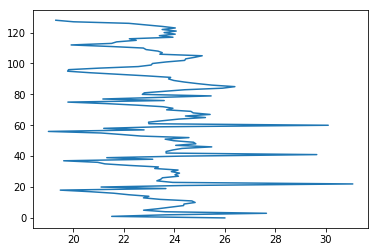

In [8]:
from matplotlib import pyplot as plt
plt.plot(arr,v)
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression as lr

In [57]:
from sklearn.ensemble import RandomForestRegressor as rfc

In [14]:
df['hour']=df.astype('category')
df['day']=df.astype('category')
df['month']=df.astype('category')
to_concat = []
for tag in ['hour','day','month']:
    dummies = pd.get_dummies(df[tag],prefix=None)
    to_concat.append(dummies)
df = pd.concat([df]+to_concat,axis=1)

In [11]:
df

,index,dayofservice,tripid,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to,routeid,...,86179,86250,86322,86394,86466,86538,86609,86681,86752,86823
0,63,04-JAN-17 00:00:00,4083863,80152,80152,80429,80429,80185,80469,68_68,...,0,0,0,0,0,0,0,0,0,0
1,131,05-JAN-17 00:00:00,4083863,80152,80152,80305,80305,80185,80330,68_68,...,0,0,0,0,0,0,0,0,0,0
2,198,06-JAN-17 00:00:00,4083863,80152,80152,79661,79661,80185,79685,68_68,...,0,0,0,0,0,0,0,0,0,0
3,267,10-JAN-17 00:00:00,4083863,80152,80152,80131,80131,80185,80163,68_68,...,0,0,0,0,0,0,0,0,0,0
4,331,13-JAN-17 00:00:00,4083863,80152,80152,79953,79953,80185,79989,68_68,...,0,0,0,0,0,0,0,0,0,0
5,395,16-JAN-17 00:00:00,4083863,80152,80152,79936,79944,80185,79983,68_68,...,0,0,0,0,0,0,0,0,0,0
6,463,17-JAN-17 00:00:00,4083863,80152,80152,79904,79904,80185,79932,68_68,...,0,0,0,0,0,0,0,0,0,0
7,530,18-JAN-17 00:00:00,4083863,80152,80152,81535,81535,80185,81565,68_68,...,0,0,0,0,0,0,0,0,0,0
8,599,15-JAN-17 00:00:00,4083864,79912,79912,80700,80700,79945,80729,68_68,...,0,0,0,0,0,0,0,0,0,0
9,667,04-JAN-17 00:00:00,4083866,83752,83752,83564,83564,83785,83592,68_68,...,0,0,0,0,0,0,0,0,0,0


In [132]:
df['weekend']=df['day']>4
df['peak1'] =  (df['hour'] <10) & (df['hour'] > 7)
df['peak2'] = (df['hour'] < 19) & (df['hour'] < 17)
train=df[df['year']==2016]


test = df[df['year']==2017]

In [ ]:
for hour in df['hour'].unique():
    
    gf

In [8]:
df.columns

Index([               'index',         'dayofservice',               'tripid',
       'plannedtime_arr_from', 'plannedtime_dep_from',  'actualtime_arr_from',
        'actualtime_dep_from',   'plannedtime_arr_to',    'actualtime_arr_to',
                    'routeid',
       ...
                        86179,                  86250,                  86322,
                        86394,                  86466,                  86538,
                        86609,                  86681,                  86752,
                        86823],
      dtype='object', length=10487)

In [151]:
rgr = rfc().fit(train[['mean','actualtime_arr_from','rain','temp']],train['traveltime'])

In [152]:
preds = rgr.predict(test[['mean','actualtime_arr_from','rain','temp']])

In [153]:
from sklearn.metrics import r2_score

In [154]:
r2_score(test['traveltime'],preds)

-0.05837738930171055

In [14]:
rgr = lr(fit_intercept=True).fit(train[['actualtime_arr_from','hour','day','month']],train['traveltime'])
preds = rgr.predict(test[['actualtime_arr_from','hour','day','month']])
r2_score(test['traveltime'],preds)

-0.1490152362032835

In [155]:
r2_score(df['traveltime'],df['mean'])

0.13129913035320895

In [156]:
percentage_error= (abs(df['traveltime']-df['mean'])/df['traveltime'])*100

In [157]:
percentage_error.mean()

6.445056849786888

In [160]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['traveltime'],df['mean'])

7.917801816052153

In [161]:
df['traveltime'].mean()

120.60997732426304

In [164]:
train = df[df['year']==2016]
test=df[df['year']==2017]

In [ ]:
arr=[]
d = {}
to_concat = []
for day in sorted(train['day'].unique()):
    d[day]={}
    gf = train[train['day']==day]
    for hour in sorted(gf['hour'].unique()):
        
        hf = gf[gf['hour']==hour]
        arr.append(hf['traveltime'].mean())
        hf['mean']=hf['traveltime'].mean()
        d[day][hour]=hf['traveltime'].mean()
        

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
arr=[]

to_concat = []
for day in sorted(test['day'].unique()):
    
    gf = test[test['day']==day]
    for hour in sorted(gf['hour'].unique()):
        
        hf = gf[gf['hour']==hour]
        arr.append(hf['traveltime'].mean())
        hf['mean']=d[day][hour]
        
        to_concat.append(hf)
test=pd.concat(to_concat,axis=0)

In [169]:
test

,index,dayofservice,tripid,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to,routeid,...,hour,year,dewpt,msl,rain,rhum,temp,vappr,wetb,mean
4291,80,09-JAN-17 00:00:00,4087679,20820,20820,20400,20428,20846,20451,40_19,...,5,2017,7.1,1014.8,0.4,84,9.5,10.1,8.4,<bound method Series.mean of 19572 21\n1957...
4296,128,16-JAN-17 00:00:00,4087679,20820,20820,20451,20483,20846,20508,40_19,...,5,2017,7.5,1029.0,0.0,93,8.6,10.4,8.1,<bound method Series.mean of 19572 21\n1957...
4297,296,16-JAN-17 00:00:00,4087680,21720,21720,21439,21459,21746,21485,40_19,...,5,2017,7.5,1029.0,0.0,93,8.6,10.4,8.1,<bound method Series.mean of 19572 21\n1957...
4302,354,06-FEB-17 00:00:00,4334319,20820,20820,20552,20579,20846,20605,40_19,...,5,2017,-1.2,1013.7,0.0,83,1.2,5.6,0.3,<bound method Series.mean of 19572 21\n1957...
4303,432,06-FEB-17 00:00:00,4334320,21720,21720,21585,21609,21746,21634,40_19,...,5,2017,-1.2,1013.7,0.0,83,1.2,5.6,0.3,<bound method Series.mean of 19572 21\n1957...
4310,508,13-FEB-17 00:00:00,4361281,21720,21720,21441,21467,21746,21491,40_19,...,5,2017,4.4,1021.1,0.6,90,5.9,8.4,5.2,<bound method Series.mean of 19572 21\n1957...
4317,586,06-MAR-17 00:00:00,4386900,20820,20820,20504,20532,20846,20558,40_19,...,5,2017,-0.1,999.3,0.0,96,0.4,6.0,0.2,<bound method Series.mean of 19572 21\n1957...
4318,902,06-MAR-17 00:00:00,4392574,21720,21720,21418,21434,21746,21453,40_19,...,5,2017,-0.1,999.3,0.0,96,0.4,6.0,0.2,<bound method Series.mean of 19572 21\n1957...
4327,682,13-MAR-17 00:00:00,4386900,20820,20820,20427,20445,20846,20466,40_19,...,5,2017,6.4,1025.3,0.0,84,8.9,9.6,7.7,<bound method Series.mean of 19572 21\n1957...
4328,998,13-MAR-17 00:00:00,4392574,21720,21720,21505,21540,21746,21565,40_19,...,5,2017,6.4,1025.3,0.0,84,8.9,9.6,7.7,<bound method Series.mean of 19572 21\n1957...


In [168]:
percentage_error= (abs(test['traveltime']-test['mean'])/test['traveltime'])*100

TypeError: unsupported operand type(s) for -: 'int' and 'method'